***Importing files***

In [0]:
from google.colab import files
upload=files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**EDA**

In [0]:
file= pd.read_csv("Churn_Modelling.csv")
file.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
file.shape

(10000, 14)

In [0]:
file.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [0]:
file.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [0]:
file['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [0]:
li = list(file[file.Exited == 0].sample(n=5900).index)
file = file.drop(file.index[li])

file['Exited'].value_counts()

0    2063
1    2037
Name: Exited, dtype: int64

In [0]:
X = file.drop(['Exited'], axis=1)
y = file['Exited']

**Label_Encoding**

In [0]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in X.columns:
    if isinstance(X[i][0], str):
            X[i] = encoder.fit_transform(X[i])

**Feature selection with Chi square & Anova**

In [0]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in X.columns:
    dfObserved = pd.crosstab(X[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = (1-p)*100                                                        

Significance.sort_values()

Surname             30.015557
CreditScore         39.351521
HasCrCard           43.708831
RowNumber           50.734273
CustomerId          50.734273
EstimatedSalary     50.734273
Balance             86.383012
Tenure              93.567168
Gender             100.000000
Geography          100.000000
Age                100.000000
NumOfProducts      100.000000
IsActiveMember     100.000000
dtype: float64

In [0]:
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
  
scalar.fit(X) 
scaled_data = scalar.transform(X) 



In [0]:
# Importing PCA 
from sklearn.decomposition import PCA 
  
# Let's say, components = 2 
pca = PCA() 
pca.fit(scaled_data) 


variance = pca.explained_variance_ratio_ #calculate variance ratios
variance

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(var)

[  9.5  17.9  26.1  34.2  42.2  50.   57.6  65.1  72.6  79.9  86.9  93.9
 100. ]


In [0]:
import scipy.stats as stats
stats.f_oneway(X['CreditScore'],y)

F_onewayResult(statistic=179527.21706694242, pvalue=0.0)

In [0]:
stats.f_oneway(X['Balance'],y)

F_onewayResult(statistic=7151.833566954778, pvalue=0.0)

In [0]:
stats.f_oneway(X['EstimatedSalary'],y)

F_onewayResult(statistic=12467.641720577834, pvalue=0.0)

In [0]:
stats.f_oneway(X['Age'],y)

F_onewayResult(statistic=59646.78192156599, pvalue=0.0)

In [0]:
X=X.drop(['Surname','RowNumber','CustomerId'],axis=1)

In [0]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
5,645,2,1,44,8,113755.78,2,1,0,149756.71
7,376,1,0,29,4,115046.74,4,1,0,119346.88


**train_test_split**

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.25, random_state = 123)

In [0]:
from sklearn import tree
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create tree object 
model = tree.DecisionTreeClassifier() # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
# model = tree.DecisionTreeRegressor() for regression
# Train the model using the training sets and check score
model.fit(X, y)
model.score(X, y)
#Predict Output
predicted= model.predict(x_test)
predicted2= model.predict(x_train)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix



In [0]:
confusion_matrix(y_test,predicted)                 # testing phase 

array([[516,   0],
       [  0, 509]])

In [0]:
accuracy_score(y_test,predicted)*100         

100.0

In [0]:
confusion_matrix(y_train,predicted2)            # training phase

array([[1547,    0],
       [   0, 1528]])

In [0]:
accuracy_score(y_train,predicted2)*100

100.0

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       516
           1       1.00      1.00      1.00       509

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025



In [0]:
x_train.shape

(3075, 10)

In [0]:
y_train.shape

(3075,)

**Cross_Validation**

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
score2=cross_val_score(model,x_test,y_test,cv=5,scoring='accuracy')*100                    # Decision Tree
score2

array([71.2195122 , 67.80487805, 61.46341463, 66.82926829, 65.85365854])

In [0]:
score3=cross_val_score(model,x_train,y_train,cv=5,scoring='neg_mean_squared_error')
score3

array([-0.30894309, -0.31219512, -0.30894309, -0.32682927, -0.30731707])

In [0]:
score4=cross_val_score(model,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
score4

array([-0.31707317, -0.34634146, -0.3902439 , -0.30243902, -0.34146341])

In [0]:
score3=-(score3)
loss3=np.sqrt(score3)
loss3

array([0.55582649, 0.55874424, 0.55582649, 0.57168984, 0.55436186])

In [0]:
score4=-(score4)
loss4=np.sqrt(score4)
loss4

array([0.56309251, 0.58850783, 0.62469505, 0.54994456, 0.58434871])

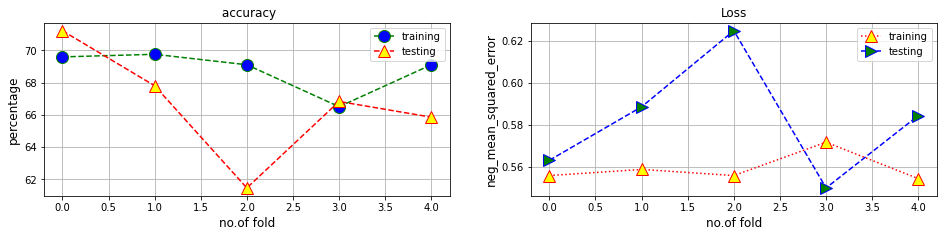

In [0]:
plt.figure(1,figsize=[16,7])
plt.subplot(221)
plt.plot(score1, color='green', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=12,label='training')

plt.plot(score2, color='red', linestyle='dashed', marker='^',
        markerfacecolor='yellow', markersize=12,label='testing')

plt.title(' accuracy')
plt.grid(True)
plt.ylabel("percentage",fontsize ='large')
plt.xlabel("no.of fold",fontsize= 'large')
plt.legend(loc="best")

plt.subplot(222)
plt.plot(loss3,color='red',linestyle='dotted',marker='^',
        markerfacecolor='yellow', markersize='12',label='training')

plt.title('Loss')
plt.grid(True)

plt.plot(loss4,color='blue',linestyle='dashed',marker='>',
        markerfacecolor='green', markersize='12',label='testing')
plt.legend(loc='best')

#plt.axis([0,5])

plt.ylabel("neg_mean_squared_error",fontsize ='large')
plt.xlabel("no.of fold",fontsize= 'large')

plt.show()

In [0]:
from sklearn import ensemble
classifier = ensemble.RandomForestClassifier()


In [0]:
score_1=cross_val_score(classifier,x_train,y_train,cv=5,scoring='accuracy')*100
score_1

array([74.47154472, 74.14634146, 76.42276423, 74.95934959, 77.39837398])

In [0]:
score_2=cross_val_score(classifier,x_test,y_test,cv=5,scoring='accuracy')*100
score_2

array([73.65853659, 75.12195122, 74.14634146, 75.6097561 , 72.19512195])

In [0]:
score_3=cross_val_score(classifier,x_train,y_train,cv=5,scoring='neg_mean_squared_error')
score_3

array([-0.25528455, -0.25365854, -0.22764228, -0.25365854, -0.22276423])

In [0]:
score_4=cross_val_score(classifier,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
score_4

array([-0.25365854, -0.24878049, -0.28292683, -0.24390244, -0.25365854])

In [0]:
score_3=-(score_3)
loss_3=np.sqrt(score_3)
loss_3

array([0.50525692, 0.50364525, 0.47711872, 0.50364525, 0.47197905])

In [0]:
score_4=-(score_4)
loss_4=np.sqrt(score_4)
loss_4

array([0.50364525, 0.498779  , 0.53190867, 0.4938648 , 0.50364525])

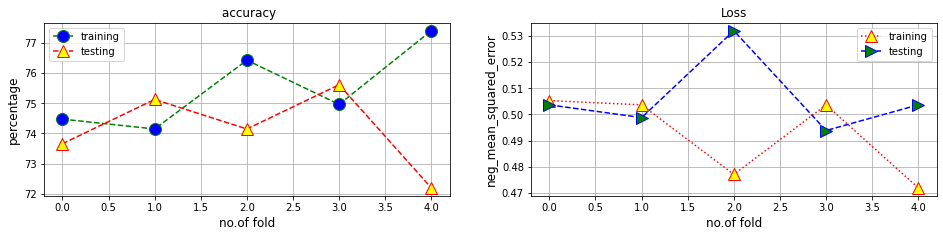

In [0]:
plt.figure(1,figsize=[16,7])
plt.subplot(221)
plt.plot(score_1, color='green', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=12,label='training')

plt.plot(score_2, color='red', linestyle='dashed', marker='^',
        markerfacecolor='yellow', markersize=12,label='testing')

plt.title(' accuracy')
plt.grid(True)
plt.ylabel("percentage",fontsize ='large')
plt.xlabel("no.of fold",fontsize= 'large')
plt.legend(loc="best")

plt.subplot(222)
plt.plot(loss_3,color='red',linestyle='dotted',marker='^',
        markerfacecolor='yellow', markersize='12',label='training')

plt.title('Loss')
plt.grid(True)

plt.plot(loss_4,color='blue',linestyle='dashed',marker='>',
        markerfacecolor='green', markersize='12',label='testing')
plt.legend(loc='best')

#plt.axis([0,5])

plt.ylabel("neg_mean_squared_error",fontsize ='large')
plt.xlabel("no.of fold",fontsize= 'large')

plt.show()

In [0]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)
y_pred_xgb = xgb_classifier.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

0.7795121951219512

In [0]:
# XGBoost classifier most required parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}


In [0]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.0s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                           verbosity=1),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [0]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3}

In [0]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# training XGBoost classifier with best parameters
xgb_classifier_pt = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [0]:
xgb_classifier_pt.fit(x_train, y_train)
y_pred_xgb_pt = xgb_classifier_pt.predict(x_test)

accuracy_score(y_test, y_pred_xgb_pt)


0.7580487804878049

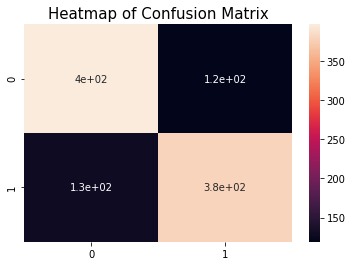

In [0]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_xgb_pt)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [0]:
print(classification_report(y_test, y_pred_xgb_pt))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       516
           1       0.76      0.75      0.75       509

    accuracy                           0.76      1025
   macro avg       0.76      0.76      0.76      1025
weighted avg       0.76      0.76      0.76      1025

